In [2]:
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt
import numpy as np
import sys

In [3]:
mydata=pd.read_csv('D:\Seminar Matematika\Brent Oil Futures Historical Data.csv')
mydata['Date']=pd.to_datetime(mydata['Date'])
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      132 non-null    datetime64[ns]
 1   Price     132 non-null    float64       
 2   Open      132 non-null    float64       
 3   High      132 non-null    float64       
 4   Low       132 non-null    float64       
 5   Vol.      132 non-null    object        
 6   Change %  132 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.3+ KB


,Date,Price,Open,High,Low,Vol.,Change %
0,1989-01-01,15.91,15.63,17.25,15.59,69.28K,2.51%
1,1989-02-01,16.40,15.69,16.61,15.16,55.27K,3.08%
2,1989-03-01,19.55,16.62,19.75,16.50,88.40K,19.21%
3,1989-04-01,18.94,18.90,20.45,18.15,98.99K,-3.12%
4,1989-05-01,17.75,18.75,18.90,16.68,85.86K,-6.28%


In [4]:
#Menentukan himpunan semesta pembicaraan (U)
U=[round(min(mydata['High'])),round(max(mydata['High']))]
D1=2
D2=2 #Suka - suka wkwk
U=[U[0]-D1,U[1]+D2]
print(U)

[9, 43]


In [5]:
#Menentukan panjang interval (R)
R=U[1]-U[0]
R=round(R,2) #pembulatan
print(R)

34


In [6]:
#Menentukan banyaknya interval kelas
n=len(mydata['High'])
K=1+3.3*math.log10(n)
K=round(K) #ini ga tau penting atau engga
print(K)

8


In [7]:
#Menentukan lebar interval
L=R/K
print(L)

4.25


In [8]:
#Mendefinisikan himpunan fuzzy dan menentukan nilai tengah
I=list()
Interval=list()
m=list()
a=U[0]
for i in range(K):
    I.append('A'+str(i+1))
    Interval.append((a,round(a+L,3)))
    m.append((a+round(a+L,3))/2)
    a=round(a+L,3)
data_tabel={'Himpunan Fuzzy' : I,
              'Interval' : Interval,
              'Nilai Tengah' : m}
df1=pd.DataFrame(data_tabel)
df1.head(10)

,Himpunan Fuzzy,Interval,Nilai Tengah
0,A1,"(9, 13.25)",11.125
1,A2,"(13.25, 17.5)",15.375
2,A3,"(17.5, 21.75)",19.625
3,A4,"(21.75, 26.0)",23.875
4,A5,"(26.0, 30.25)",28.125
5,A6,"(30.25, 34.5)",32.375
6,A7,"(34.5, 38.75)",36.625
7,A8,"(38.75, 43.0)",40.875


In [9]:
#Membuat tabel Fuzzy Logical Relationship (FLR)
fuzzyfikasi=list()
relasi=list()
r=0
for i in range(n):
    for j in range(K):
        if mydata['High'][i]>=df1['Interval'][j][0] and mydata['High'][i]<=df1['Interval'][j][1]:
            fuzzyfikasi.append(df1['Himpunan Fuzzy'][j])
            if r==0:
                relasi.append('-')
            else:
                relasi.append(r+'->'+df1['Himpunan Fuzzy'][j])
            r=df1['Himpunan Fuzzy'][j]
            break
        else:
            continue
data_aktual={'Tanggal' : mydata['Date'],
             'Data' : mydata['High'],
             'Fuzzyfikasi' : fuzzyfikasi,
             'Relasi' : relasi}
df2=pd.DataFrame(data_aktual)
df2.head(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
0,1989-01-01,17.25,A2,-
1,1989-02-01,16.61,A2,A2->A2
2,1989-03-01,19.75,A3,A2->A3
3,1989-04-01,20.45,A3,A3->A3
4,1989-05-01,18.90,A3,A3->A3
5,1989-06-01,18.10,A3,A3->A3
6,1989-07-01,18.27,A3,A3->A3
7,1989-08-01,17.30,A2,A3->A2


In [10]:
df2.tail(8)

,Tanggal,Data,Fuzzyfikasi,Relasi
124,1999-05-01,17.09,A2,A2->A2
125,1999-06-01,17.52,A3,A2->A3
126,1999-07-01,19.95,A3,A3->A3
127,1999-08-01,21.42,A3,A3->A3
128,1999-09-01,24.30,A4,A3->A4
129,1999-10-01,23.85,A4,A4->A4
130,1999-11-01,25.90,A4,A4->A4
131,1999-12-01,26.15,A5,A4->A5


In [11]:
#Membuat Fuzzy Logic Relationship Group
grup=list()
FLR=list()
for i in range(len(I)):
    grup.append('Grup '+str(i+1))
    FLR1=list()
    for j in range(1,n):
        if relasi[j][1:3]==str(i+1):
            FLR1.append(fuzzyfikasi[j])
        elif relasi[j][1:3]==str(i+1)+'-':
            FLR1.append(fuzzyfikasi[j])
        else:
            pass
    FLR2='A'+str(i+1)+'->'
    for ii in range(len(FLR1)):
        FLR2+=FLR1[ii]+','
    FLR2=FLR2[:-1]
    FLR.append(FLR2)
        
data_FLRG={'Grup' : grup,
           'Himpunan Fuzzy' : I,
           'FLR' : FLR}
df3=pd.DataFrame(data_FLRG)
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"A1->A2,A1,A1,A2"
1,Grup 2,A2,"A2->A2,A3,A3,A3,A2,A2,A2,A2,A2,A2,A2,A3,A2,A3,..."
2,Grup 3,A3,"A3->A3,A3,A3,A3,A2,A3,A3,A3,A4,A3,A3,A3,A2,A6,..."
3,Grup 4,A4,"A4->A3,A3,A4,A3,A3,A4,A4,A4,A4,A4,A3,A4,A4,A5"
4,Grup 5,A5,A5-
5,Grup 6,A6,"A6->A8,A6,A3"
6,Grup 7,A7,A7->A6
7,Grup 8,A8,"A8->A8,A7"


In [12]:
#FLRG Pengulangan
#Catatan : Untuk run code ini, sebaiknya run yang sebelumnya terlebih dahulu agar terhindar dari error
for i in range(len(df3)):
    bb=df3['FLR'][i]
    if i>=0 and i<=8:
        bb=bb[4:]
    elif i>=9:
        bb=bb[5:]
    bb=bb.split(',')
    cc=list()
    for ii in range(len(bb)):
        if bb[ii] in cc:
            pass
        else:
            cc.append(bb[ii])
    dd=list()
    for j in range(len(cc)):
        k=0
        for jj in range(len(bb)):
            if cc[j]==bb[jj]:
                k+=1
            else:
                pass
        dd.append(str(k)+'('+cc[j]+')')
    df3['FLR'][i]=dd
df3.head(10)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"[2(A2), 2(A1)]"
1,Grup 2,A2,"[24(A2), 8(A3), 2(A1)]"
2,Grup 3,A3,"[59(A3), 7(A2), 6(A4), 1(A6)]"
3,Grup 4,A4,"[5(A3), 8(A4), 1(A5)]"
4,Grup 5,A5,[1()]
5,Grup 6,A6,"[1(A8), 1(A6), 1(A3)]"
6,Grup 7,A7,[1(A6)]
7,Grup 8,A8,"[1(A8), 1(A7)]"


In [13]:
#Pembuatan DataFrame Pembobotan Fuzzy
A=list()
o=list()
for i in range(len(df3)):
    A.append('A'+str(i+1))
    o.append(0)
df4={'X(t-1)' : A}
for i in range(len(df3)):
    df4[A[i]]=o
df4=pd.DataFrame(df4)
df4.head(K)        

,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,0,0,0,0,0,0,0,0
1,A2,0,0,0,0,0,0,0,0
2,A3,0,0,0,0,0,0,0,0
3,A4,0,0,0,0,0,0,0,0
4,A5,0,0,0,0,0,0,0,0
5,A6,0,0,0,0,0,0,0,0
6,A7,0,0,0,0,0,0,0,0
7,A8,0,0,0,0,0,0,0,0


In [14]:
#Input Bobot Ke Dalam Matriks Pembobobotan Fuzzy
for i in range(len(df3)):
    x=df3['FLR'][i]
    for j in range(len(x)):
        y=x[j].split('(')
        y2=y[1]
        if y2==')':
            pass
        else:
            df4[y2[:-1]][i]=int(y[0])
for i in range(len(df4)):
    df4[A[i]]=df4[A[i]].astype(float)
df4.info()
df4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(t-1)  8 non-null      object 
 1   A1      8 non-null      float64
 2   A2      8 non-null      float64
 3   A3      8 non-null      float64
 4   A4      8 non-null      float64
 5   A5      8 non-null      float64
 6   A6      8 non-null      float64
 7   A7      8 non-null      float64
 8   A8      8 non-null      float64
dtypes: float64(8), object(1)
memory usage: 704.0+ bytes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,X(t-1),A1,A2,A3,A4,A5,A6,A7,A8
0,A1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A2,2.0,24.0,8.0,0.0,0.0,0.0,0.0,0.0
2,A3,0.0,7.0,59.0,6.0,0.0,1.0,0.0,0.0
3,A4,0.0,0.0,5.0,8.0,1.0,0.0,0.0,0.0
4,A5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,A7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,A8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [15]:
#Pembobotan Normalisasi
Bobot_Norm=df4.drop(['X(t-1)'],axis=1)
Bobot_Norm=Bobot_Norm.values
for i in range(len(Bobot_Norm)):
    jum=sum(Bobot_Norm[i])
    for j in range(len(Bobot_Norm)):
        ele=float(Bobot_Norm[i][j])
        Bobot_Norm[i][j]=ele/jum
print(Bobot_Norm)

[[0.5        0.5        0.         0.         0.         0.
  0.         0.        ]
 [0.05882353 0.70588235 0.23529412 0.         0.         0.
  0.         0.        ]
 [0.         0.09589041 0.80821918 0.08219178 0.         0.01369863
  0.         0.        ]
 [0.         0.         0.35714286 0.57142857 0.07142857 0.
  0.         0.        ]
 [       nan        nan        nan        nan        nan        nan
         nan        nan]
 [0.         0.         0.33333333 0.         0.         0.33333333
  0.         0.33333333]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.5       ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [16]:
#Perkalian Elemen Bobot Normalisasi dengan Median (m1 X Bobot A1)
M=list()
for i in range(len(Bobot_Norm)):
    Mn=list()
    for j in range(len(Bobot_Norm)):
        Mnn=Bobot_Norm[i][j]*df1['Nilai Tengah'][j]
        Mn.append(Mnn)
    M.append(Mn)
print(M)

[[5.5625, 7.6875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6544117647058824, 10.852941176470589, 4.617647058823529, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.4743150684931505, 15.861301369863014, 1.9623287671232876, 0.0, 0.4434931506849315, 0.0, 0.0], [0.0, 0.0, 7.008928571428571, 13.642857142857142, 2.008928571428571, 0.0, 0.0, 0.0], [nan, nan, nan, nan, nan, nan, nan, nan], [0.0, 0.0, 6.541666666666666, 0.0, 0.0, 10.791666666666666, 0.0, 13.625], [0.0, 0.0, 0.0, 0.0, 0.0, 32.375, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.3125, 20.4375]]


In [17]:
#Pembuatan Data Frame Peramalan
t=list()
for i in range(len(mydata)):
    t.append(i+1)
df6={'t' : t,
     'Tanggal' : mydata['Date'],
     'Data' : mydata['High']}
Ft=list()
Ft.append(0)
for i in range(1,len(mydata)):
    Wn=df2['Fuzzyfikasi'][i-1]
    Wn=int(Wn[1:])
    jum_norm=sum(M[Wn-1])
    Ft.append(jum_norm)
df6['Peramalan F(t)']=Ft
df6=pd.DataFrame(df6)
df6.info()
df6.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   t               132 non-null    int64         
 1   Tanggal         132 non-null    datetime64[ns]
 2   Data            132 non-null    float64       
 3   Peramalan F(t)  132 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.2 KB


,t,Tanggal,Data,Peramalan F(t)
0,1,1989-01-01,17.25,0.000000
1,2,1989-02-01,16.61,16.125000
2,3,1989-03-01,19.75,16.125000
3,4,1989-04-01,20.45,19.741438
4,5,1989-05-01,18.90,19.741438
5,6,1989-06-01,18.10,19.741438
6,7,1989-07-01,18.27,19.741438
7,8,1989-08-01,17.30,19.741438


In [18]:
df6.tail(8)

,t,Tanggal,Data,Peramalan F(t)
124,125,1999-05-01,17.09,16.125000
125,126,1999-06-01,17.52,16.125000
126,127,1999-07-01,19.95,19.741438
127,128,1999-08-01,21.42,19.741438
128,129,1999-09-01,24.30,19.741438
129,130,1999-10-01,23.85,22.660714
130,131,1999-11-01,25.90,22.660714
131,132,1999-12-01,26.15,22.660714


In [19]:
#Menghitung Nilai Error (|e|)
df7={'t' : df6['t'],
     'Tanggal' : df6['Tanggal'],
     'Data' : df6['Data'],
     'Peramalan F(t)' : df6['Peramalan F(t)']}
e=list()
e.append(0)
for i in range(1,len(df6)):
    ee=df6['Data'][i]-df6['Peramalan F(t)'][i]
    ee=math.sqrt(ee**2)
    e.append(ee)
df7['Error']=e
df7=pd.DataFrame(df7)
df7.info()
df7.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   t               132 non-null    int64         
 1   Tanggal         132 non-null    datetime64[ns]
 2   Data            132 non-null    float64       
 3   Peramalan F(t)  132 non-null    float64       
 4   Error           132 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 5.3 KB


,t,Tanggal,Data,Peramalan F(t),Error
0,1,1989-01-01,17.25,0.000000,0.000000
1,2,1989-02-01,16.61,16.125000,0.485000
2,3,1989-03-01,19.75,16.125000,3.625000
3,4,1989-04-01,20.45,19.741438,0.708562
4,5,1989-05-01,18.90,19.741438,0.841438
5,6,1989-06-01,18.10,19.741438,1.641438
6,7,1989-07-01,18.27,19.741438,1.471438
7,8,1989-08-01,17.30,19.741438,2.441438


In [20]:
df7.tail(8)

,t,Tanggal,Data,Peramalan F(t),Error
124,125,1999-05-01,17.09,16.125000,0.965000
125,126,1999-06-01,17.52,16.125000,1.395000
126,127,1999-07-01,19.95,19.741438,0.208562
127,128,1999-08-01,21.42,19.741438,1.678562
128,129,1999-09-01,24.30,19.741438,4.558562
129,130,1999-10-01,23.85,22.660714,1.189286
130,131,1999-11-01,25.90,22.660714,3.239286
131,132,1999-12-01,26.15,22.660714,3.489286


In [21]:
#Menentukan MAE atau MSE
N=len(e)
MAE=sum(e)/N
e_kuadrat=list()
for i in range(N):
    e_kuadrat.append(e[i]**2)
MSE=sum(e_kuadrat)/N
RMSE=math.sqrt(MSE)
print('Nilai MAE adalah ', MAE)
print('Nilai MSE adalah ', MSE)
print('Nilai RMSE adalah ', RMSE)

Nilai MAE adalah  1.6235582587123683
Nilai MSE adalah  5.377527135963354
Nilai RMSE adalah  2.318949575985505


<function matplotlib.pyplot.show(*args, **kw)>

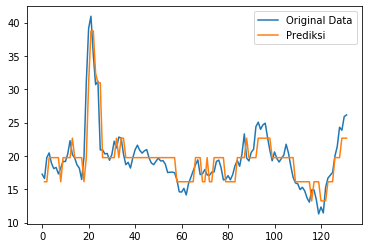

In [22]:
plt.plot(df7['Data'],label='Original Data')
plt.plot(df7['Peramalan F(t)'][1:], label='Prediksi')
plt.legend(loc='upper right')
plt.show